In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline 
import yfinance as yf
import plotly.graph_objs as go

In [7]:
start_date = '2018-08-10'
end_date = '2024-02-08'

df = yf.download('AAPL', start=start_date, end=end_date)
#df.reset_index(inplace=True)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-10,51.840000,52.275002,51.667500,51.882500,49.624233,98444800
2018-08-13,52.327499,52.737499,51.924999,52.217499,49.944656,103563600
2018-08-14,52.540001,52.639999,52.064999,52.437500,50.155083,82992000
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.272259,115230400
2018-08-16,52.937500,53.452499,52.867500,53.330002,51.008732,114001600


In [8]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-10,51.840000,52.275002,51.667500,51.882500,49.624233,98444800
1,2018-08-13,52.327499,52.737499,51.924999,52.217499,49.944656,103563600
2,2018-08-14,52.540001,52.639999,52.064999,52.437500,50.155083,82992000
3,2018-08-15,52.305000,52.685001,52.082500,52.560001,50.272259,115230400
4,2018-08-16,52.937500,53.452499,52.867500,53.330002,51.008732,114001600


In [9]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-10,51.840000,52.275002,51.667500,51.882500,49.624233,98444800
2018-08-13,52.327499,52.737499,51.924999,52.217499,49.944656,103563600
2018-08-14,52.540001,52.639999,52.064999,52.437500,50.155083,82992000
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.272259,115230400
2018-08-16,52.937500,53.452499,52.867500,53.330002,51.008732,114001600


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,119.005914,120.365190,117.743511,119.122882,117.638796,1.044833e+08
std,49.024333,49.480732,48.596061,49.066719,49.422616,5.470037e+07
min,35.994999,36.430000,35.500000,35.547501,34.118877,2.404830e+07
25%,66.016253,66.891874,65.626249,66.459377,64.760242,6.876895e+07
50%,131.695000,133.330002,130.050003,131.880005,129.801163,9.034970e+07
75%,159.352497,161.155003,156.945004,159.147499,157.749035,1.244377e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,4.265100e+08


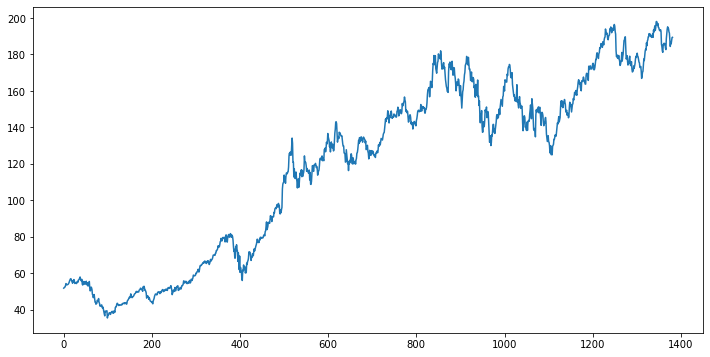

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df2['Close'])

plt.show()

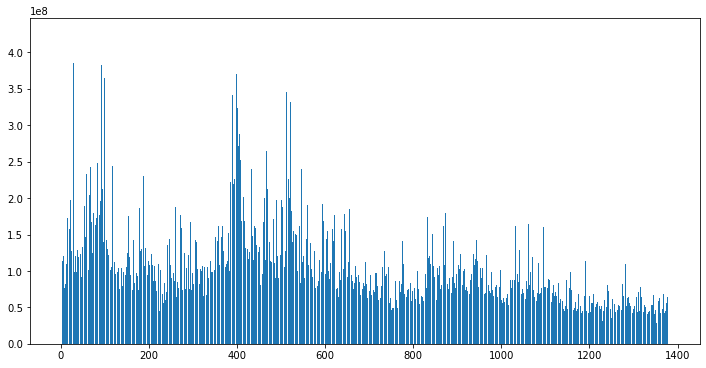

In [12]:
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Volume'])
plt.show()

In [13]:
# data = list(df2["Close"])

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

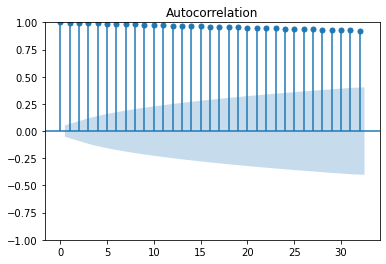

In [15]:
plot_acf(df2['Close'])
plt.show()

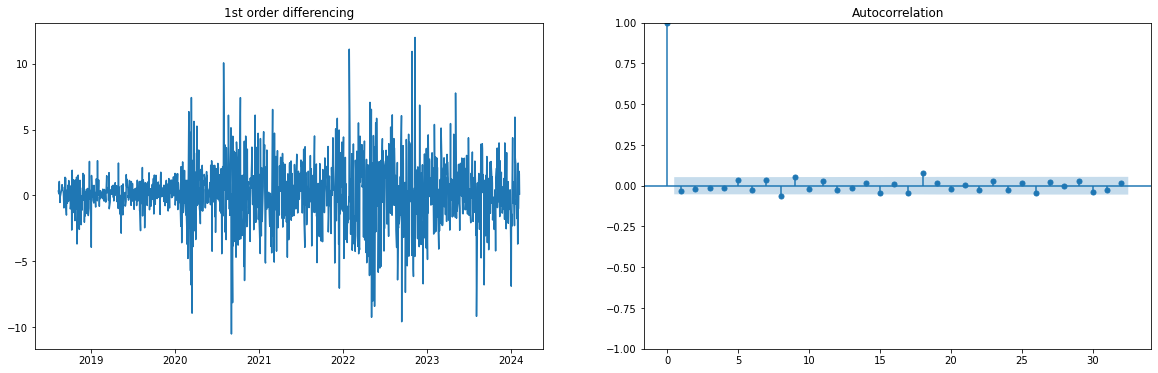

In [16]:
#differencing to calculate d value
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df2['Close'].diff())


ax2=f.add_subplot(122)
plot_acf(df2['Close'].diff().dropna(), ax=ax2)
plt.show()

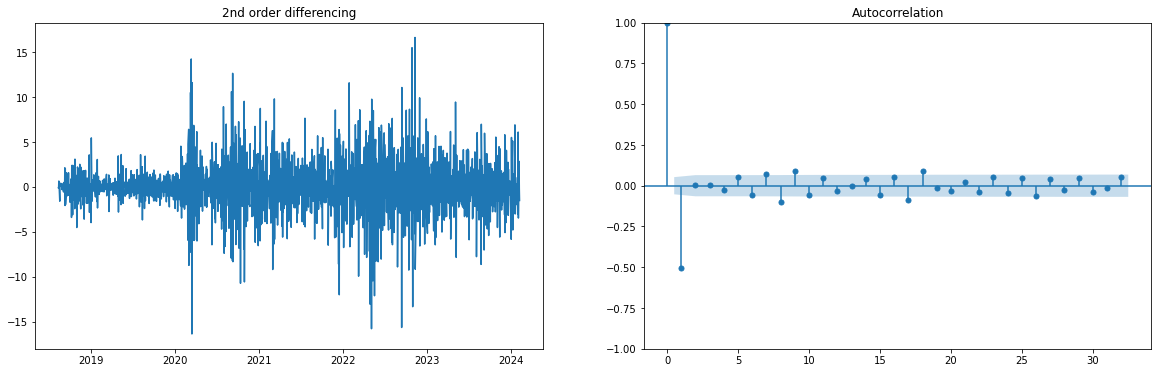

In [17]:
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df2['Close'].diff().diff())

ax2=f.add_subplot(122)
plot_acf(df2['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

In [18]:
# plot_pacf(df2['Close'])
# plt.show()

In [19]:
# from statsmodels.tsa.stattools import adfuller

# result = adfuller(data)
# print("1. ADF : ",result[0])
# print("2. P-Value : ", result[1])
# print("3. Num Of Lags : ", result[2])
# print("4. Num Of Observations Used For ADF Regression:", result[3])
# print("5. Critical Values :")
# for key, val in result[4].items():
#   print("\t",key, ": ", val)

NameError: name 'data' is not defined

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df2['Close'].dropna())
print("p-value : ",result[1])

result = adfuller(df2['Close'].diff().dropna())
print("p-Value : ", result[1])

result = adfuller(df2['Close'].diff().diff().dropna())
print("p-Value : ", result[1])

# print("Num Of Lags : ", result[1])

p-value :  0.8092888810267378
p-Value :  0.0
p-Value :  1.0876774229829253e-25


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


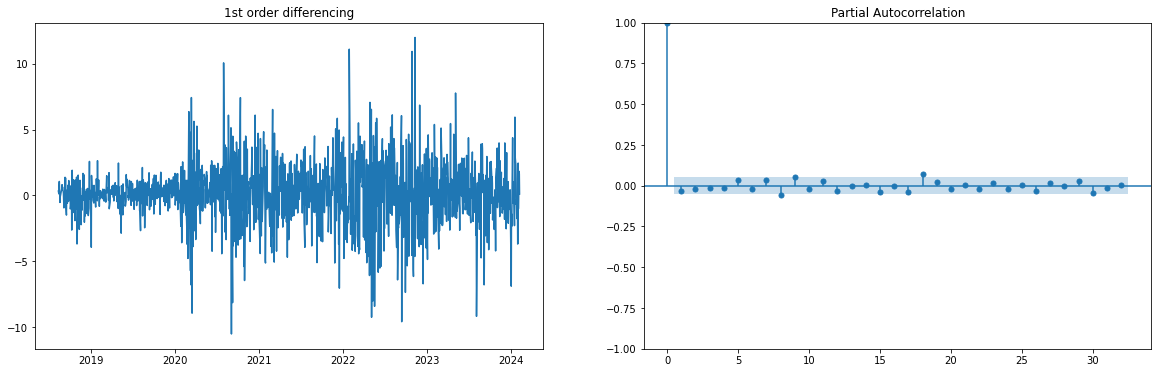

In [21]:
#partial autocorrelation differencing to calculate p value
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df2['Close'].diff())


ax2=f.add_subplot(122)
plot_pacf(df2['Close'].diff().dropna(), ax=ax2)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


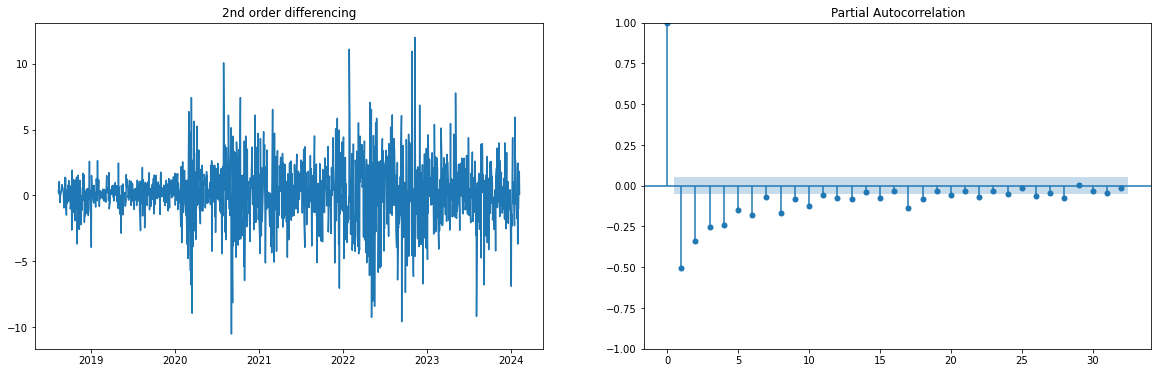

In [22]:
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df2['Close'].diff())


ax2=f.add_subplot(122)
plot_pacf(df2['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

d=1, p=1, q=2

In [23]:
!pip install pmdarima

In [24]:
data = list(df2["Close"])

In [25]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [26]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1282 100


In [28]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6242.085, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6258.238, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6258.634, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6258.559, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6258.761, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6261.649, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6261.645, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6260.607, Time=1.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6259.710, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6258.530, Time=0.67 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6263.552, Time=0.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6264.556, Time=0.22 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] interc

In [29]:
import statsmodels.api as sm
# model = sm.tsa.arima.ARIMA(data, order=(0,0,0)) #p, d, q

In [30]:
# model = sm.tsa.arima.ARIMA(data, order=(1,1,1))

In [31]:
model = sm.tsa.arima.ARIMA(data, order=(0,1,1))

In [32]:
# import statsmodels.api as sm
# model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [33]:
model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1382
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3127.634
Date:                Fri, 09 Feb 2024   AIC                           6259.268
Time:                        21:20:21   BIC                           6269.729
Sample:                             0   HQIC                          6263.182
                               - 1382                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0336      0.021     -1.632      0.103      -0.074       0.007
sigma2         5.4284      0.136     39.806      0.000       5.161       5.696
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               441.80
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
model.save('model.pkl')

In [35]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([175.69111977, 175.03285653, 177.87141571, 179.02977649,
       175.60881821, 173.9863426 , 174.76301868, 176.03579718,
       172.09681097, 170.48593957, 170.68315305, 171.19232283,
       173.66415135, 172.44242545, 173.61913555, 174.86667556,
       177.4019532 , 178.93670238, 178.40834952, 179.75329208,
       180.67789451, 178.91135933, 178.72642417, 177.20290691,
       175.88574255, 175.47429657, 172.9670825 , 172.99889512,
       173.42519664, 171.17805132, 167.03392822, 168.18019058,
       170.21917758, 170.75151573, 173.86197248, 177.44554682,
       176.6766967 , 179.14429403, 181.73019678, 182.85107052,
       182.42480811, 186.26656645, 184.84922838, 187.35304289,
       187.98794387, 189.65220553, 189.68873378, 191.39088   ,
       190.66520276, 191.28835497, 190.01425188, 189.79752054,
       190.37977183, 189.40388836, 189.93166677, 191.19609099,
       189.48927192, 193.28806301, 192.3525002 , 194.20564308,
       195.65951262, 193.26321797, 194.66144513, 197.84

In [36]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2023-09-15    175.691120
2023-09-18    175.032857
2023-09-19    177.871416
2023-09-20    179.029776
2023-09-21    175.608818
                 ...    
2024-02-01    184.526356
2024-02-02    186.781672
2024-02-05    185.881278
2024-02-06    187.619619
2024-02-07    189.243601
Length: 100, dtype: float64

In [37]:
# trace_actual = go.Scatter(x=df2.index[-100:], y=df2['Close'][-100:], mode='lines', name='Actual Stock Price')

# # Create a trace for the predicted price
# trace_predicted = go.Scatter(x=df2.index[-100:], y=s[-100:], mode='lines', name='Predicted Price')

# # Create the layout for the plot
# layout = go.Layout(title='Actual vs Predicted Stock Price',
#                    xaxis=dict(title='Date'),
#                    yaxis=dict(title='Price'),
#                    showlegend=True)

# # Create a figure with the traces and layout
# fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)

# # Show the plot
# fig.show()

<AxesSubplot:xlabel='Date'>

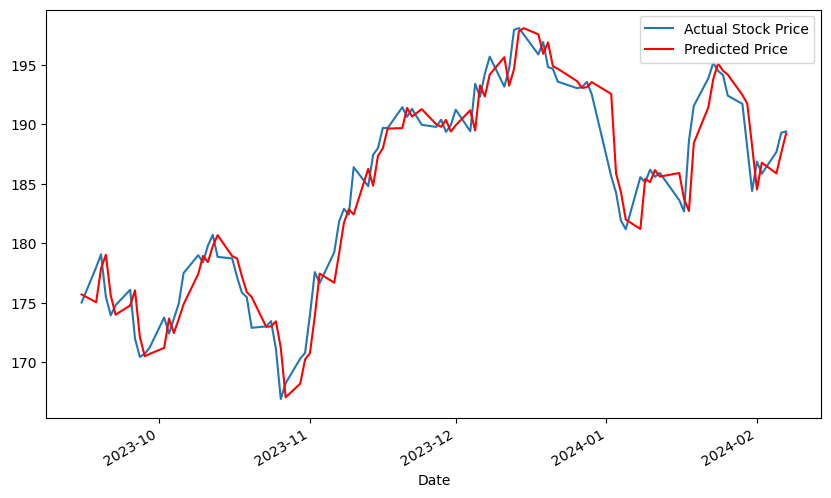

In [38]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True, color='red')

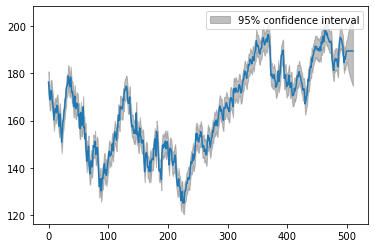

In [39]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(x_test,pred))

2.0753868822979937

In [41]:
np.sqrt(mean_absolute_error(x_test,pred))

1.2759271333660704

In [42]:
# residuals = x_test - pred
# covariance_matrix = np.cov(residuals, rowvar=False)
# print("Covariance Matrix:")
# print(covariance_matrix)

In [43]:


# mse = mean_squared_error(test_data, pred)
# print('Mean Squared Error (MSE):', mse)

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(test_data, pred)
# print('Mean Absolute Error (MAE):', mae)

# # Calculate Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mse)
# print('Root Mean Squared Error (RMSE):', rmse)

In [44]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9384739132056344

Predicting Future 10 values:

In [45]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([189.24360081, 189.40441834, 189.40441834, 189.40441834,
       189.40441834, 189.40441834, 189.40441834, 189.40441834,
       189.40441834, 189.40441834, 189.40441834])

In [60]:
import datetime
start_date = datetime.datetime(2024,2,8)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [61]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2024-02-08    189.243601
2024-02-09    189.404418
2024-02-10    189.404418
2024-02-11    189.404418
2024-02-12    189.404418
2024-02-13    189.404418
2024-02-14    189.404418
2024-02-15    189.404418
2024-02-16    189.404418
2024-02-17    189.404418
2024-02-18    189.404418
dtype: float64

In [48]:
# trace_actual = go.Scatter(x=df2.index[-300:], y=df2['Close'][-300:], mode='lines', name='Actual Stock Price')

# # Shift the x-values for the future predicted price trace
# future_index = df2.index[-300:] + pd.DateOffset(days=len(df2) - 300)
# trace_future_predicted = go.Scatter(x=future_index, y=pred_future2, mode='lines', name='Future Predicted Price')

# # Create the layout for the plot
# layout = go.Layout(
#     title='Actual vs Future Predicted Stock Price',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Price'),
#     showlegend=True
# )

# # Create a figure with the traces and layout
# fig = go.Figure(data=[trace_actual, trace_future_predicted], layout=layout)

# # Show the plot
# fig.show()

<AxesSubplot:xlabel='Date'>

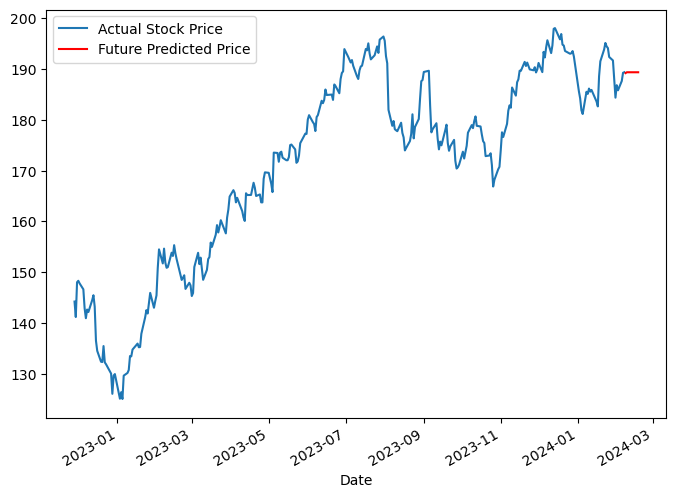

In [62]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=8,6
plt.figure(dpi=100)
df2['Close'][-300:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True, color='red')

In [63]:
start_date = '2024-02-08'
end_date = '2024-02-18'

check_df = yf.download('AAPL', start=start_date, end=end_date)
check_df.reset_index(inplace=True)
check_df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-02-08,189.389999,189.539993,187.350006,188.320007,188.320007,40928600
1,2024-02-09,188.649994,188.925995,188.000000,188.630005,188.630005,9358969


In [64]:
check_df.Date= pd.to_datetime(check_df.Date)
check_df2 =check_df.set_index('Date')

In [65]:
check_df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-08,189.389999,189.539993,187.350006,188.320007,188.320007,40928600
2024-02-09,188.649994,188.925995,188.000000,188.630005,188.630005,9358969


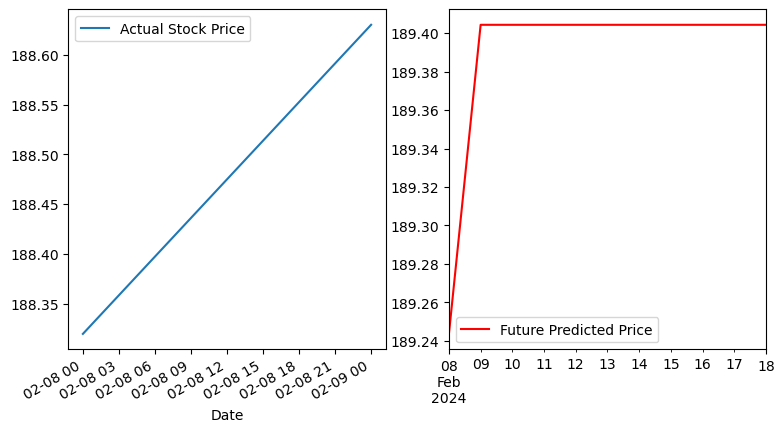

In [66]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 2)
pred_future2.plot(label='Future Predicted Price', legend=True, color='red')
plt.subplot(1, 2, 1)
check_df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()

In [59]:
# from plotly.subplots import make_subplots
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Future Predicted Price", "Actual Stock Price"))


# # Add the trace for Actual Stock Price to the second subplot
# trace_actual = go.Scatter(x=check_df2.index, y=check_df2['Close'], mode='lines', name='Actual Stock Price')
# fig.add_trace(trace_actual, row=1, col=1)

# # Add the trace for Future Predicted Price to the first subplot
# trace_predicted = go.Scatter(x=pred_future2.index, y=pred_future2, mode='lines', name='Future Predicted Price', line=dict(color='orange'))
# fig.add_trace(trace_predicted, row=1, col=2)

# # Update the layout of the figure
# fig.update_layout(title_text="Future Predicted Price vs Actual Stock Price", showlegend=True)

# # Show the plot
# fig.show()